In [1]:
import numpy as np
import oceanDAS as odas
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, datetime, timezone
from scipy import signal
import glob
from os import path
import xarray as xr
import netCDF4 as nc

%matplotlib inline
%cd -q '/Users/hglover/Library/CloudStorage/Box-Box/FiberExperiments/DAScomparison_paper/'


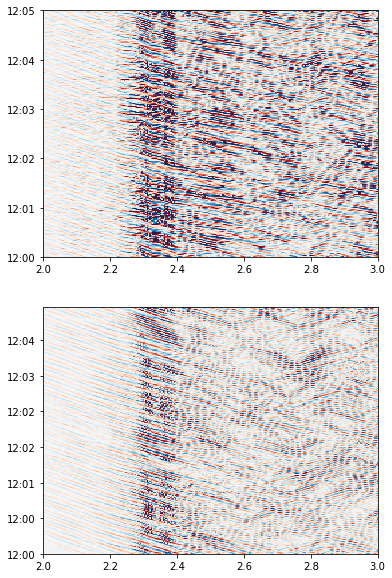

In [2]:
# plot example of KNO
pname = 'MarthasVineyard_Smith/'
fname = '20221223120000_f0200Hz_dx4m_nch2112_f2Hz.nc'

d = nc.Dataset(pname+fname)
samples = d['sample'][:]
chnl = d['channel'][:]
rawstrain = d['strain'][:]*(1e-9) # convert from nanostrain to strain
rawstrain = rawstrain.T
Y = int(fname[0:4])
M = int(fname[4:6])
D = int(fname[6:8])
H = int(fname[8:10])
t = datetime(Y, M, D, H, 0, 0,tzinfo=timezone.utc).timestamp()
das_time = t+np.arange(0,30*60,0.5)
metadata = {'fs':2,'gl':10,'dx':4}
ns,nx = rawstrain.shape
X = np.arange(0,metadata['dx']*nx,metadata['dx'])/1000
# convert to strain from strain rate
rawstrain = (rawstrain[2:,:] - rawstrain[:-2,:])*(1/metadata['fs'])
rawstrain = np.insert(rawstrain,0, rawstrain[0,:],axis=0)
rawstrain = np.insert(rawstrain,-1, rawstrain[-1,:],axis=0)


fk_filter_matrix = odas.fk_filter_design((ns,nx), dx=metadata['dx'], fs=metadata['fs'], 
                                         cs_min=5, cp_min=6, cp_max=11, cs_max=12)
filtstrain = odas.fk_filter_filt(rawstrain, fk_filter_matrix)


tvec = mdates.date2num((das_time)*1e+6)
fig, ax = plt.subplots(2,1,figsize=(6,10))
ax[0].pcolormesh(X, tvec, rawstrain,cmap='RdBu',vmin=-2e-6,vmax=2e-6) 

pcm = ax[1].pcolormesh(X, tvec, filtstrain,cmap='RdBu',vmin=-2e-6,vmax=2e-6) 
# plt.colorbar(pcm,ax=ax[1],location='bottom')

ax[0].set_ylim([tvec[0],tvec[2*60*5]])
ax[1].set_ylim([tvec[0],tvec[2*60*5]])
ax[0].yaxis.set_major_locator(mdates.MinuteLocator())

ax[0].yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax[1].yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax[0].set_xlim([2,3])
ax[1].set_xlim([2,3])

fig.savefig('/Users/hglover/Downloads/mvco_sampletimestack.png')

(2.0, 3.0)

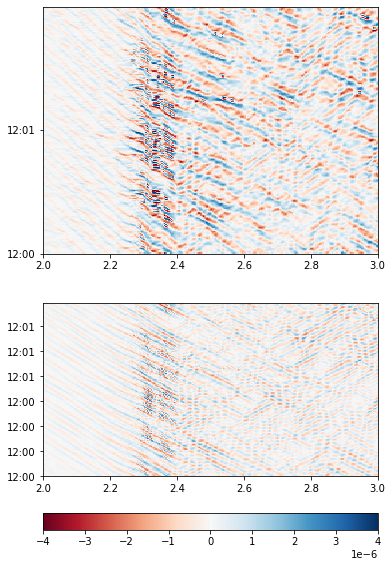

In [3]:
# plot example of KNO
pname = 'MarthasVineyard_Smith/'
fname = '20221223120000_f0200Hz_dx4m_nch2112_f2Hz.nc'


# Case 6: MVCO
rawstrain,das_time,chnl,metadata = odas.loadMV(pname,fname)
rawstrain = rawstrain[:(60*5*2),:]
das_time = das_time[:(60*5*2)]
tvec = mdates.date2num((das_time)*1e+6)
ns,nx = rawstrain.shape
X = np.arange(0,metadata['dx']*nx,metadata['dx'])/1000
fk_filter_matrix = odas.fk_filter_design((ns,nx), dx=metadata['dx'], fs=metadata['fs'], 
                                         cs_min=5, cp_min=6, cp_max=11, cs_max=12)
filtstrain = odas.fk_filter_filt(rawstrain, fk_filter_matrix)


fig, ax = plt.subplots(2,1,figsize=(6,10))
ax[0].pcolormesh(X, tvec, rawstrain,cmap='RdBu',vmin=-4e-6,vmax=4e-6) 

pcm = ax[1].pcolormesh(X, tvec, filtstrain,cmap='RdBu',vmin=-4e-6,vmax=4e-6) 
plt.colorbar(pcm,ax=ax[1],location='bottom')

ax[0].set_ylim([tvec[0],tvec[-1]])
ax[1].set_ylim([tvec[0],tvec[-1]])
ax[0].yaxis.set_major_locator(mdates.MinuteLocator())

ax[0].yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax[1].yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax[0].set_xlim([2,3])
ax[1].set_xlim([2,3])

